In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [99]:
im = cv2.imread("effects\\spec2.png")

In [100]:
imHeight, imWidth = im.shape[0], im.shape[1]
centreX, centreY = imWidth//2, imHeight//2
centreY, centreX

(145, 417)

In [101]:
rotationMat = cv2.getRotationMatrix2D(
    center=(centreX, centreY),
    angle=20,
    scale=1
)
rotationMat

array([[  0.93969262,   0.34202014, -24.44474365],
       [ -0.34202014,   0.93969262, 151.36696975]])

In [102]:
cos = np.abs(rotationMat[0][0])
sin = np.abs(rotationMat[1][0])
cos, sin

(0.9396926207859084, 0.3420201433256687)

In [103]:
newWidth = int((imHeight * sin) + (imWidth * cos))
newHeight = int((imHeight * cos) + (imWidth * sin))
newHeight, newWidth, im.shape

(559, 884, (291, 835, 3))

In [104]:
rotationMat[0][2] = 0
rotationMat[1][2] += newHeight/2 - centreY
rotationMat

array([[  0.93969262,   0.34202014,   0.        ],
       [ -0.34202014,   0.93969262, 285.86696975]])

In [105]:
rotatedMat = cv2.warpAffine(
    src=im,
    M=rotationMat,
    dsize=(newWidth, newHeight)   
)

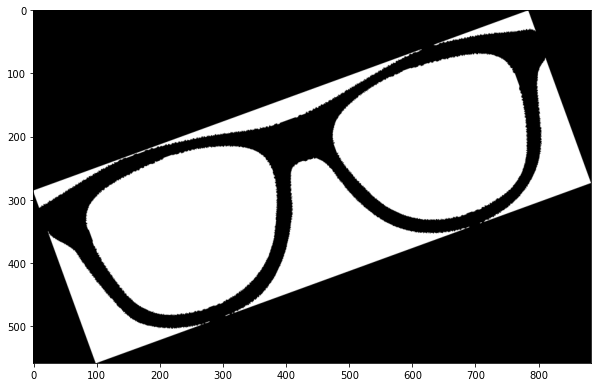

In [108]:
plt.figure(figsize=(10, 10))
plt.imshow(rotatedMat)